<a href="https://colab.research.google.com/github/tims-prog/VIBE_Camera-Python/blob/main/VIBE_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python with the JADAK Vibe Machine Vision Camera



This Application Note Example shows how to use the Python programming language to connect to a JADAK Camera (running J-Pro firmware). This example presumes that you have Python v3.8.X installed with a local jupyter notebook server running and a "VIBE" camera attached to the local machine.

    **NOTE:** *Examples require Python v3.8.X and the packages listed below*

#Environment Setup
 
**Python 3.8.X for Windows**

https://www.python.org/ftp/python/3.8.5/python-3.8.5-amd64.exe


Select a 'custom install' 
Choose the 'py' launcher and install all custom options. Install for all users on the machine, and to keep things simple, place the install in the C:\Program Files directory.  
 
The installer should update your windows PATH accordingly. this can be accessed by right clicking on "This PC" in Windows file exploder and selecting Advanced system settings -> Environmnent Variables

In this dialog box, you can add/subtract to your Windows environment pathname. 
 
Make sure you add the Python installation directory to your Windows PATH environment variable, specifically:

    C:[Python Installation path]\Scripts  C:[Python Installation path]

**NOTE:** *During the installation process make sure you check the box for adding Python to your environment variable PATH.*

Once the above has been installed for all users on the machine, start a Windows Powershell 'Run as administrator' and use the Python3 installer ***pip3*** to install jupyter notebook and the other required Python packages.


You can get the latest binary installer of WIndows PowerShell here:
     https://aka.ms/powershell

Download the 'requirements.txt' file from the google drive and place it in your local working directory: 

    PS C:\WINDOWS\system32> pip3 install -r requirements.txt
    
Add the Python 'Scripts' directory to your Windows PATH, then setup the jupyter server to enable locally sourced http connections.

The install locations can vary:  e.g. 
    c:\users\tim.schneider\appdata\roaming\python\python36\site-packages

    PS C:\WINDOWS\system32> jupyter serverextension enable --py jupyter_http_over_ws

Download and edit the  *startJupyter.bat*  file to point to the local working directory where you extracted and installed the  *lab_datafiles.zip.*

Next, from the Windows cmd/powershell start the local jupyter server.

    PS C:\WINDOWS\system32> startJupyter.bat

Copy the line that appears once the server starts, e.g:
*http://localhost:8888/?token=3d969668917bea8baa95294337d6a87652f82fe25f596d05*
  
In the upper r.h. corner of the Google Collab window there will be an option to connect to a locally hosted server.   Select that option and paste the unique URL for the server running on your PC (similar to the URL above)

More info can be found here:URL: https://research.google.com/colaboratory/local-runtimes.html


===================================================================================================================

# **Getting Started**
The first step is to import the Python language packages required.  

Note: there are additional packages here that are used in examples later in the notebook)

In [ ]:
import serial
import glob
import io
import time
import random
import binascii
import sys
import serial.tools.list_ports
import scipy
from   xmodem import XMODEM
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image                       # to load images
from IPython.display import display  # to display images


Quick check to confirm Google Collab access to local file system


C:\Users\tims\Documents\PythonVibe


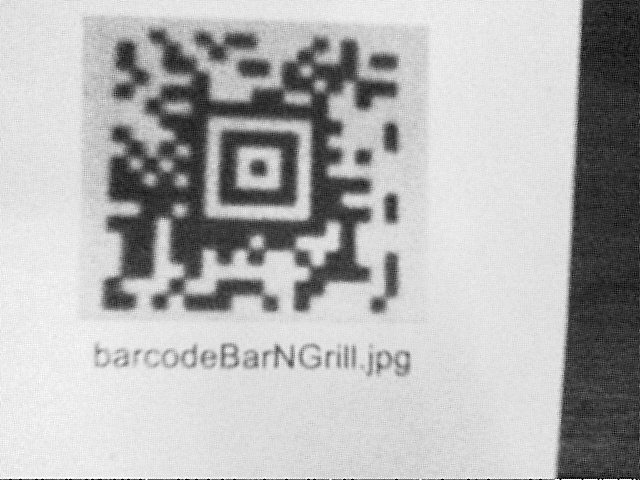

In [ ]:
import os
import os.path
import inspect

# Add parent folder to sys path
currentdir = os.path.dirname(os.path.abspath(
inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.environ['PYTHONPATH'] = currentdir
print(currentdir)

#Display Image
pil_im = Image.open('Testimages/barcodeBarNGrill.jpg')
display(pil_im)


# Lab 1:  Basic J-Pro Command Formatting

The JADAK J-Pro Command syntax is a 'hashtag' followed by a specific camera command. For example, a 'trigger on' command to the camera would be as follows:

 **   #TRGON**

We need to translate the command above into it's hexidecimal character equiv.


In [ ]:
def TRGON():
    frame = bytearray()
    # #TRGON
    frame.append(0x23)
    frame.append(0x54)
    frame.append(0x52)
    frame.append(0x47)
    frame.append(0x4F)
    frame.append(0x4E)
    frame.append(0x0D)
    return frame

There are dozens of J-PRO commands making the implentation above quite tedious. The more general function would look like the following.



In [ ]:
def jpro_command(cmd: str):
    frame = bytearray()

    for i in range(len(cmd)):
        hex_string = hex(ord(cmd[i]))
        hex_val = int(hex_string, 0)
        frame.append(hex_val)

    frame.append(0x0D)
    return frame

# Lab 2: Serial Communication with the Camera

Now we have a bytearray with the J-Pro commmand structure built up. 
The formatted command is returned via the 'frame' bytearray variable.  
This will be used, along with the Python Serial communications package PySerial (for Serial I/O) to send the command to the attached camera and also to receive/print the response.

In [ ]:
def send_rcv_cmd(ser: serial.Serial, cmd: bytearray):
    print("<<  Sending Command to Camera  >>")
    wrt_count = bytearray()
    response = bytearray()
    print(str(cmd))
    wrt_count = ser.write(cmd)
    response = str(ser.readline())
    print("<<  Camera Response  >>")
    print(response)
    print(" ")
    return response

Putting it all together in a #Main program looks like this;
Be sure to have a VIBE camera connected prior to running the example below

In [ ]:
#Main
if __name__ == "__main__":

    print(" ")
    print("Camera Serial Port:")
    #Change this serial string identifier to match hardware.
    COMport = str(next(serial.tools.list_ports.grep("USB Serial")))
    print(COMport)
    print(" ")
    cameraCOMport = COMport.split()

    #Create a Serial port object for communication.
    port = serial.Serial(cameraCOMport[0], 115200, timeout=5)

    #Send command to serial port and read the response
    command = jpro_command("#JDKPRIV 1")
    port.timeout = 5
    resp = send_rcv_cmd(port, command)
    
    #Send command to serial port and read the response
    command = jpro_command("#REVSOFT")
    port.timeout = 5
    resp = send_rcv_cmd(port, command)

    #Send command to serial port and read the response
    command = jpro_command("#REVTIME")
    port.timeout = 5
    resp = send_rcv_cmd(port, command)

    if len(resp) == 0:
        port.close()
    time.sleep(5)

    print("Done")
    port.close()

 
Camera Serial Port:
COM4 - USB Serial Device (COM4)
 
<<  Sending Command to Camera  >>
bytearray(b'#JDKPRIV 1\r')
<<  Camera Response  >>
b'#+\r'
 
<<  Sending Command to Camera  >>
bytearray(b'#REVSOFT\r')
<<  Camera Response  >>
b'#FW-VIBEMX01-04-B4-R2\r'
 
<<  Sending Command to Camera  >>
bytearray(b'#REVTIME\r')
<<  Camera Response  >>
b'#Jun 13 2017 10:01:36\r'
 
Done


Now issue the #TRGON command which tells the camera to take an image and look for a 2D barcode


In [ ]:
#Main
if __name__ == "__main__":

    print(" ")
    print("Camera Serial Port:")
    #Change this serial string identifier to match hardware.
    COMport = str(next(serial.tools.list_ports.grep("USB Serial")))
    print(COMport)
    print(" ")
    cameraCOMport = COMport.split()

    #Create a Serial port object for communication.
    port = serial.Serial(cameraCOMport[0], 115200, timeout=5)

    #Generate Trigger On Command String
    command = jpro_command("#TRGON")
 
    #Send command to serial port and read the response
    resp = send_rcv_cmd(port, command)

    if len(resp) == 0:
        port.close()
    time.sleep(3)

    print("Done")
    port.close()

 
Camera Serial Port:
COM4 - USB Serial Device (COM4)
 
<<  Sending Command to Camera  >>
bytearray(b'#TRGON\r')
<<  Camera Response  >>
b'#17221B0E12\r'
 
Done


# Lab 3: Receiving Data from the Camera using XMODEM Protocol

To see the camera image, the command #IMGGETX is used.  This will cause the camera to send the buffered image over the serial connection to the host.  Image data is transferred in multiple byte blocks using the XMODEM protocol.  To communicate to the camera, the #IMGGETX command has to be issued, over an appropriate XMODEM serial channel with the host program waiting on the response.

The image data will be sent as JPG and saved to file 'lastimage.jpg'


In [ ]:
def rcv_img_xmodem(ser: serial.Serial, cmd: bytearray, jpgfile: str):
    print("<<  Requesting last image from Camera  >>")
    wrt_count = bytearray()
    print(str(cmd))
    wrt_count = ser.write(cmd)
    stream = open(jpgfile, 'wb')
    num_bytes = modem.recv(stream, crc_mode=0, quiet=1)
    stream.close()
    print("<<  Camera Response - Received >>")
    print(" ")
    return num_bytes 

 
Camera Serial Port:
COM4 - USB Serial Device (COM4)
 
<<  Sending Command to Camera  >>
bytearray(b'#TRGON\r')
<<  Camera Response  >>
b'#17221B0E12\r'
 
<<  Requesting last image from Camera  >>
bytearray(b'#IMGGETX xm jpg a=1 e=24 k=777 u=156 q=50\r')


recv error: getc timeout in start sequence


<<  Camera Response - Received >>
 
Done Image Xfer Complete


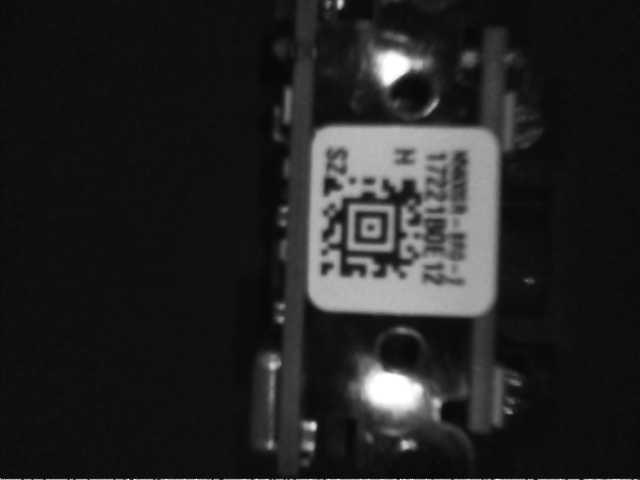

In [ ]:
#Main
if __name__ == "__main__":

    print(" ")
    print("Camera Serial Port:")
    #Change this serial string identifier to match hardware.
    COMport = str(next(serial.tools.list_ports.grep("USB Serial")))
    print(COMport)
    print(" ")
    cameraCOMport = COMport.split()

    #Create a Serial port object for communication.
    port = serial.Serial(cameraCOMport[0], 115200, timeout=5)

    def getc(size, timeout=8):
        gbytes = port.read(size)
        return gbytes or None

    def putc(data, timeout=8):
        pbytes = port.write(data )
        return pbytes or None

    modem = XMODEM(getc, putc, mode='xmodem')
    command = jpro_command("#TRGON")
    resp = send_rcv_cmd(port, command)

    #Generate IMGGETX command string
    #IMGGETX Ships an image from the device. 
    #Args: 
    #'A=' infinity filter (0=off, 1=on), 'C=' compensation (0=off, 1=on), 
    #'D=' pixel depth (1|8|24), 'E=' edge sharpen (1-24), 'F=' format (refer to UG for values), 
    #DO NOT USE IF 'JPG' OPTION USED, 'H=' histogram stretch (0=off, 1=on), 
    #'I=' invert image (X=x-axis, Y=y-axis), 'N=' noise reduction (0=off, 1=on),
    #'K=' gamma correction (0-1000), 'S=' pixel ship (1-3), 'U=' document image filter (0-255), 
    #'V=' blur image (0=off, 1=on), 'W=' ship histogram (0=off, 1=on), 'Q=' quality (0-100), 
    #'ROT=' rotation (90|180|270), 
    #'RGB' send color image, 'JPG' send as jpeg, DO NOT USE IF 'F=' OPTION USED, 
    #'XM' use xmodem, DO NOT USE IF 'HM' OPTION USED, 
    #'HM' use hmodem, DO NOT USE IF 'XM' OPTION USED
    command = jpro_command("#IMGGETX xm jpg a=1 e=24 k=777 u=156 q=50") #Best Setting for VIBE

    #Request last image from Camera
    resp = rcv_img_xmodem(port, command, 'lastimage.jpg')
    print("Done Image Xfer Complete")
    
    #Display Image
    pil_im = Image.open('lastimage.jpg')
    display(pil_im)
    
    port.close()

# Lab 4:  Sending data to the Camera via XMODEM Protocol

Data can also be sent to the Jadak VIBE Machine Vision Camera. 

In this example, the last camera image (from the prior code cell) can be uploaded to the camera via the serial port (using XMODEM) and the "#IMGUPLD lastimage.jpg" command

A decode test command #DECTEST follows to check if the barcode can be read. 



In [ ]:
def snd_img_xmodem(ser: serial.Serial, cmd: bytearray, jpgfile: str):
    print("<<  Sending Image to Camera  >>")
    wrt_count = bytearray()
    response = bytearray()
    print(str(cmd)) 
    stream = open(jpgfile, 'rb')
    wrt_count = ser.write(cmd)
    response = str(ser.readline())
    #print(response) 
    num_bytes = modem.send(stream,quiet=True)
    stream.close()
    print("<<  Camera Response - JPG Image Uploaded >>")
    print("")    
    return num_bytes

 
Camera Serial Port:
COM4 - USB Serial Device (COM4)
 
<<  Sending Command to Camera  >>
bytearray(b'#JDKPRIV 1\r')


send error: expected ACK; got b'\x15'


<<  Camera Response  >>
b'#+\r'
 
<<  Sending Image to Camera  >>
bytearray(b'#IMGUPLD lastimage.jpg\r')
<<  Camera Response - JPG Image Uploaded >>

<<  Sending Command to Camera  >>
bytearray(b'#DECTEST\r')
<<  Camera Response  >>
b'#+\r#17221B0E12\r#+\r'
 


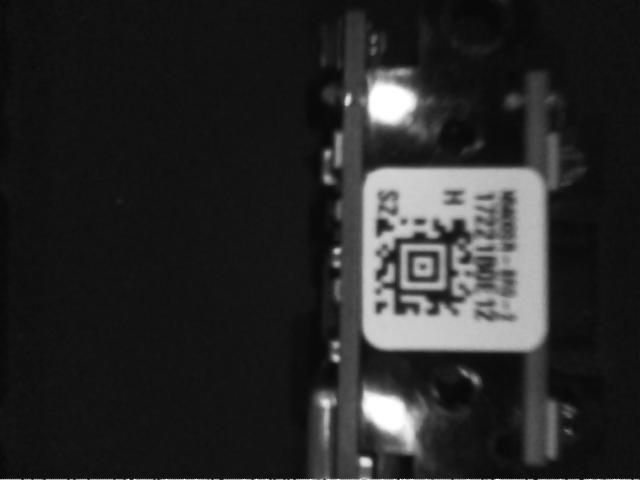

In [ ]:
#Main
if __name__ == "__main__":

    print(" ")
    print("Camera Serial Port:")
    #Change this serial string identifier to match hardware.
    COMport = str(next(serial.tools.list_ports.grep("USB Serial")))
    print(COMport)
    print(" ")
    cameraCOMport = COMport.split()

    #Create a Serial port object for communication.
    port = serial.Serial(cameraCOMport[0], 115200, timeout=5)

    def getc(size, timeout=8):
        gbytes = port.read(size)
        return gbytes or None

    def putc(data, timeout=8):
        pbytes = port.write(data )
        return pbytes or None

    #Send command to serial port and read the response
    command = jpro_command("#JDKPRIV 1")
    resp = send_rcv_cmd(port, command)

    #Generate IMGUPLD Command String using test image
    jpgfile = "lastimage.jpg"
    command = jpro_command("#IMGUPLD " + jpgfile)
    #Send test.jpg Image via serial port and read the response
    resp = snd_img_xmodem(port, command, jpgfile)

    #Send command to serial port and read the response
    command = jpro_command("#DECTEST")
    resp = send_rcv_cmd(port, command)

    #Display Image
    pil_im = Image.open('lastimage.jpg')
    display(pil_im)
    
    port.close()

#Lab 5: Image Processing
Before sending data to the VIBE Maching Learning Camera, we can first manipulate it using Python and CV2.

In this example, the camera is directed to take an image and check for a barcode via #TRGON. The last image is retrieved from the camera. 

Using the OpenCV package library (imported as CV2) an Unsharp Mask algorithm is applied, sharpening the image, and the image histograms are plotted and saved.  

The image is then sent back to the camera along with the #DECTEST command to see if the barcode can be decoded. Both images are displayed along with histograms for comparison.


In [ ]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened   

 
Camera Serial Port:
COM4 - USB Serial Device (COM4)
 
<<  Sending Command to Camera  >>
bytearray(b'#TRGON\r')
<<  Camera Response  >>
b'#NOREAD\r'
 
<<  Requesting last image from Camera  >>
bytearray(b'#IMGGETX xm jpg u=77 q=100\r')


recv error: getc timeout in start sequence


<<  Camera Response - Received >>
 
<<  Sending Command to Camera  >>
bytearray(b'#JDKPRIV 1\r')


send error: expected ACK; got b'\x15'


<<  Camera Response  >>
b'#+\r#+\r'
 
<<  Sending Image to Camera  >>
bytearray(b'#IMGUPLD lastimageUSM.jpg\r')
<<  Camera Response - JPG Image Uploaded >>

<<  Sending Command to Camera  >>
bytearray(b'#DECTEST\r')
<<  Camera Response  >>
b'#+\r#+\r'
 
Closing USB/Serial Camera Port Connection


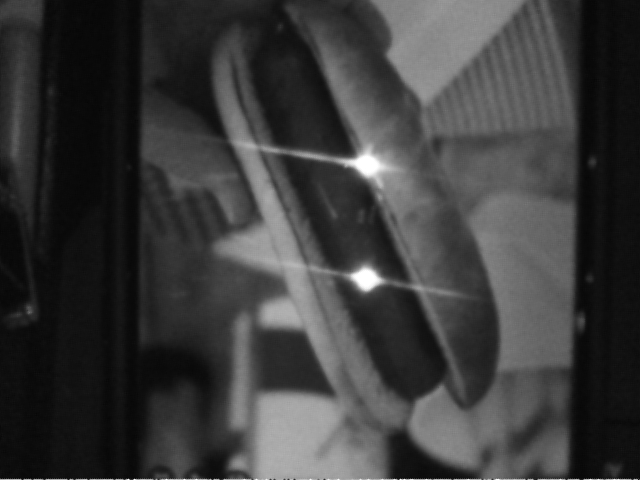

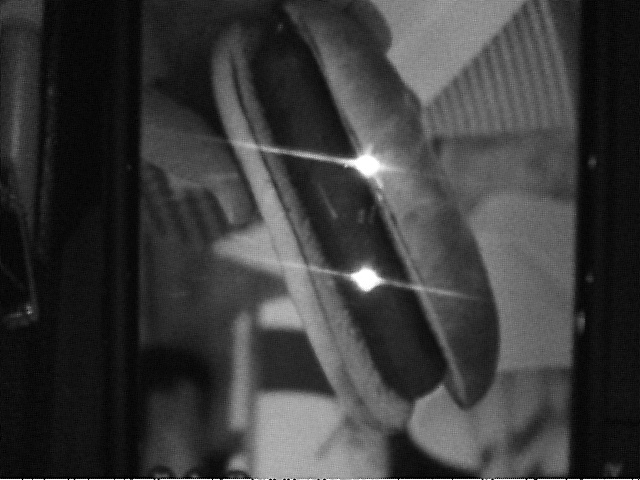

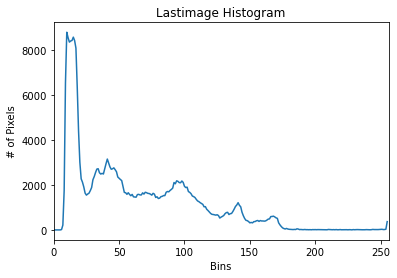

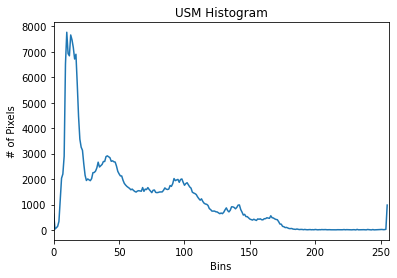

In [ ]:
#Main
if __name__ == "__main__":

    print(" ")
    print("Camera Serial Port:")
    #Change this serial string identifier to match hardware.
    COMport = str(next(serial.tools.list_ports.grep("USB Serial")))
    #COMport = str(next(serial.tools.list_ports.grep("CH340")))
    #COMport = str(next(serial.tools.list_ports.grep("Prolific")))
    print(COMport)
    print(" ")
    cameraCOMport = COMport.split()

    #Create a Serial port object for communication.
    port = serial.Serial(cameraCOMport[0], 115200, timeout=5)

    def getc(size, timeout=8):
        gbytes = port.read(size)
        #DBG print(f'Read Byte: {gbytes}')
        return gbytes or None

    def putc(data, timeout=8):
        pbytes = port.write(data )
        #DBG print(f'Put Byte: {pbytes}')
        return pbytes or None

    modem = XMODEM(getc, putc, mode='xmodem')
    
    #Generate Trigger On Command String
    command = jpro_command("#TRGON")
    resp = send_rcv_cmd(port, command)

    #Generate Snap Image Command String
    #command = jpro_command("#NTV_CMD IMGSNP1P1L")
    #resp = send_rcv_cmd(port, command)

    #Generate Snap Image Command String
    #command = jpro_command("#IMGSNAP")
    #resp = send_rcv_cmd(port, command)

    #Generate IMGGETX Command String
    #command = jpro_command("#IMGGETX xm jpg a=1 e=24 k=777 u=156 q=50") #Best Setting for VIBE
    command = jpro_command("#IMGGETX xm jpg u=77 q=100") #Best Setting for VIBE
    #port.timeout = 5
    #Request Image via serial port and read the response
    resp = rcv_img_xmodem(port, command, 'lastimage.jpg')
   

    #Open image from camera
    image = cv.imread('lastimage.jpg')
    

    #Apply Unsharp Mask Algo to image
    sharpened_image = unsharp_mask(image, amount=2.7)
    cv.imwrite('lastimageUSM.jpg', sharpened_image)
    
    #Generate histogram of image and plot
    hist1 = cv.calcHist([image], [0], None, [256], [0, 256])
    plt.figure()
    plt.title("Lastimage Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist1)
    plt.xlim([0, 256])
    plt.savefig("OrigHist.png")

    hist = Image.open('OrigHist.png')
    #display(hist)

    #Generate histogram of image and plot
    hist2 = cv.calcHist([sharpened_image], [0], None, [256], [0, 256])
    plt.figure()
    plt.title("USM Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist2)
    plt.xlim([0, 256])
    plt.savefig("USMHist.png")

    sharp_hist = Image.open("USMHist.png")
    #display(sharp_hist)
   
 
    #Send command to serial port and read the response
    command = jpro_command("#JDKPRIV 1")
    resp = send_rcv_cmd(port, command)

    #Generate IMGUPLD Command String using test image
    filename = "lastimageUSM.jpg"
    command = jpro_command("#IMGUPLD " + filename)

    #Send lastimage.jpg Image via serial port and read the response
    resp = snd_img_xmodem(port, command, filename)

    #Send command to serial port and read the response
    command = jpro_command("#DECTEST")
    resp = send_rcv_cmd(port, command)

    sharp_hist.close()
    hist.close()

    #if len(resp) == 0:
        #port.close()
    time.sleep(1)
    print("Closing USB/Serial Camera Port Connection")
    port.close()

    image = Image.open('lastimage.jpg')
    display(image)

    imageUSM = Image.open('lastimageUSM.jpg')
    display(imageUSM)

#Lab 6: Extra Credit! Use Transfer Learning for image classification
In this final example, we use a Tensorflow/Keras Convolutional Neural Network to perform image classification on the last camera image. 

C:\Users\tims\Documents\PythonVibe


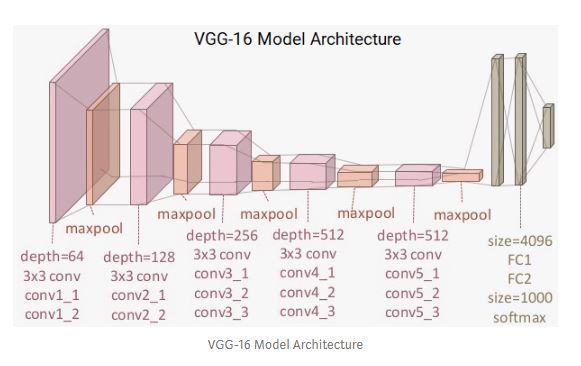

In [ ]:
from PIL import Image                       # to load images
from IPython.display import display  # to display images
import os
import os.path
import inspect

# Add parent folder to sys path
currentdir = os.path.dirname(os.path.abspath(
inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.environ['PYTHONPATH'] = currentdir
print(currentdir)

#Display Image
image = Image.open('Testimages/VGG16-Arch.jpg')
display(image)


<ul>Objects in the 'barcodes' dataset used to train the last two classification layers<ul>
  <ul>
    <li>Aztec</li>
    <li>ConicalTube</li>
    <li>Datamatrix</li>
    <li>EmptyTube</li>
    <li>Linear</li>
    <li>QR</li>
    <li>RubberStopperWideTube</li>
    <li>ScrewTopTube</li>
    <li>hotdog</li>
    <li>not-barcode</li>
  </ul>



Training and Validation Accuracy over 200+ Epochs/Runs

C:\Users\tims\Documents\PythonVibe


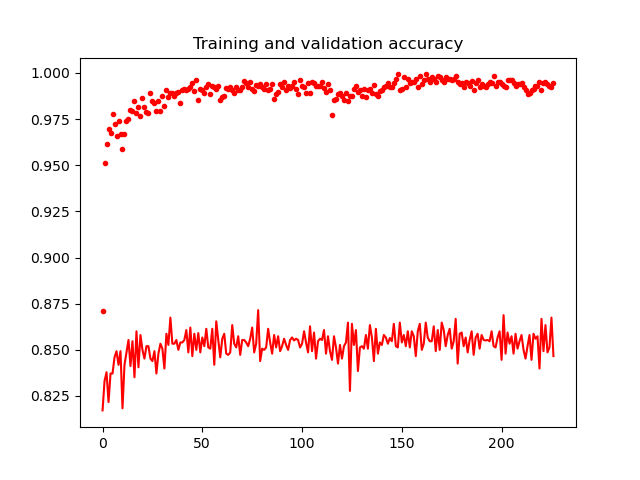

In [ ]:
print(currentdir)
#Display Image
image = Image.open('Testimages/VGG16tandvAccuracy.png')
display(image)

Load the VGG16 Image classification model and the information from the training runs to fine tune the last two CNN layers



In [ ]:
#===================================================================================================================
# Run the image through a pre-trained  VGG16 Neural Network to determine image category
#
#Main
if __name__ == "__main__":

    # Networks
    from tensorflow import keras
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.applications.vgg16 import VGG16
    #from efficientnet.keras import EfficientNetB7
    from tensorflow.keras.applications.vgg16 import preprocess_input

    # Prepare the model with Global settings
 
    WIDTH = int(244)
    HEIGHT = int(244)
    FC_LAYERS = [1024, 1024]

    preprocessing_function = None
    base_model = None
    dataset = "barcodes"
    CNNmodel = 'VGG16'
    #CNNmodel = 'EfficientNetB7'
    preprocessing_function = preprocess_input
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))

    # Layers
    from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
    from tensorflow.keras import backend as K

    # Other
    from tensorflow.keras import optimizers
    from tensorflow.keras import losses
    from tensorflow.keras.optimizers import SGD, Adam
    from tensorflow.keras.models import Sequential, Model
    from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
    from tensorflow.keras.models import load_model

    # Utils
    import os, csv
    import time, datetime

    class_list_file = "checkpoints/VGG16_barcodes_class_list.txt"
    model_weights_file = "checkpoints/VGG16_model_weights.h5"

    def load_class_list(class_list_file):
        class_list = []
        with open(class_list_file, 'r') as csvfile:
            file_reader = csv.reader(csvfile)
            for row in file_reader:
              class_list.append(row)
        class_list.sort()
        return class_list

    # Add on new FC layers with dropout for fine tuning
    def build_finetune_model(base_model, dropout, fc_layers, num_classes):
        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = Flatten()(x)
        for fc in fc_layers:
            x = Dense(fc, activation='relu')(x) # New FC layer, random init
            x = Dropout(dropout)(x)

        predictions = Dense(num_classes, activation='softmax')(x) # New softmax layer
        finetune_model = Model(inputs=base_model.input, outputs=predictions) 
        return finetune_model


Classify the  last image "lastimageUSM.jpg by updating the CNN and calling the models prediction function



In [ ]:
#Main
if __name__ == "__main__":

# Read in your last image with USM applied
    inputimage = "lastimageUSM.jpg"
    image = cv.imread(inputimage,-1)
    save_image = image
    image = np.float32(cv.resize(image, (244, 244)))
    image = preprocessing_function(image.reshape(1, 244, 244, 3))

    # Load the Network image class list and load the previously saved Xfer Learning data
    class_list = load_class_list(class_list_file)
    finetune_model = build_finetune_model(base_model, dropout=float(1e-3), fc_layers=FC_LAYERS, num_classes=len(class_list))
    finetune_model.load_weights(model_weights_file)

    # Run the classifier and print results
    st = time.time()
    out = finetune_model.predict(image)
    confidence = out[0]
    class_prediction = list(out[0]).index(max(out[0]))
    class_name = class_list[class_prediction]
    run_time = time.time()
    print(" ")
    print("Predicted class = ", class_name)
    print("Confidence = ", confidence)
    print("Run time = ", run_time)
    cv.imwrite("Predictions/" + class_name[0] + ".png", save_image)

NameError: ignored